In [1]:
import glob
import os
import matplotlib.pyplot as plt
import palettable.colorbrewer.diverging as pld
import numpy as np
import pandas as pd

In [2]:
%matplotlib widget

In [3]:
plt.close('all')

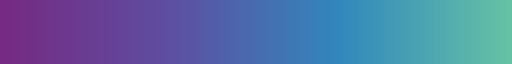

In [4]:
from matplotlib.colors import LinearSegmentedColormap

colors = [
    # (0.25098039215686274, 0.0, 0.29411764705882354), 
    (0.4627450980392157, 0.16470588235294117, 0.5137254901960784),
    (0.3686274509803922, 0.30980392156862746, 0.6352941176470588), 
    (0.19607843137254902, 0.5333333333333333, 0.7411764705882353), 
    (0.4, 0.7607843137254902, 0.6470588235294118),
 # (0.6705882352941176, 0.8666666666666667, 0.6431372549019608),
 # (0.6509803921568628, 0.8509803921568627, 0.41568627450980394),
 # (0.10196078431372549, 0.5882352941176471, 0.2549019607843137), 
         ]

BlGn = LinearSegmentedColormap.from_list('BlGn', colors, N=100)
BlGn

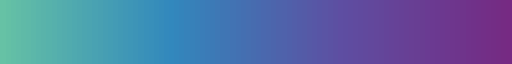

In [5]:
BlGn_r = LinearSegmentedColormap.from_list('BlGn_r', list(reversed(colors)), N=100)
BlGn_r

In [6]:
# working_dir = '/Users/chenghunglin/Documents/Git_BNL/Data_process/20240829_Cl_OAm'
working_dir = '/Users/chenghung/Documents/Git_MAC_2015/Data_process/20240829_Cl_OAm'
csv_fn = os.path.join(working_dir,'20240829_Cl_OAm.csv')

In [7]:
col_name = ['CsPb(OA)3', 'TOABr', 'ZnCl2', 'OAm_Tol', 'Peak_nm', 'FWHM_nm', 'PLQY', 'OAm_frac', 'Total', 'R_time_sec', 'Cl_Pb', 'OA_frac', ]
df = pd.read_csv(csv_fn, sep=',', usecols=col_name, dtype=np.float32)


In [8]:
total_rate_0 = [90.0, 180.0, 270.0, 360.0]
OAm_frac_0 = [0.03, 0.05, 0.07]
Cl_Pb_ratio_0 = [0.3, 0.75, 1.5, 3.0, 4.5]
# Cl_Pb_ratio_0 = [0.3, 1.5, 4.5]

## Case 1-1: Plot by OAm_frac vs. Peak_nm at fixed total_rate

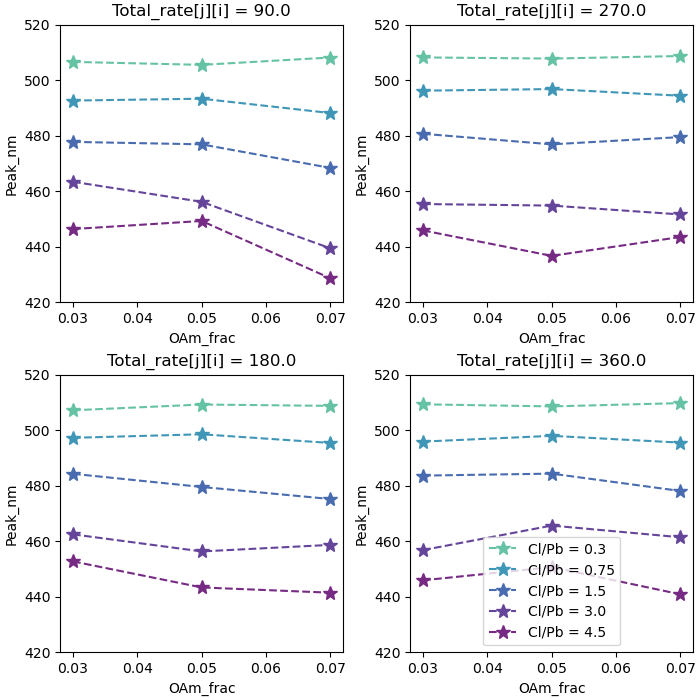

In [31]:
rows = 2
cols = 2
Total_rate = np.asarray(total_rate_0).reshape(cols, rows).T
f11, ax11 = plt.subplots(rows, cols, figsize = (7, 7), constrained_layout=True)
x_label = 'OAm_frac'
y_label = 'Peak_nm'
color_idx = np.linspace(0, 1, len(Cl_Pb_ratio_0))
for i in range(cols):
    for j in range(rows):
        ax11[j][i].set_title(f'{Total_rate[j][i] = }')
        for k in range(len(Cl_Pb_ratio_0)):
            df_01 = df[df.Total==Total_rate[j][i]]
            df_02 = df_01[df_01.Cl_Pb==Cl_Pb_ratio_0[k]]
            x = df_02[x_label]
            y = df_02[y_label]
            label = f'Cl/Pb = {Cl_Pb_ratio_0[k]}'
            ax11[j][i].plot(x, y, '*--', label=label, color=BlGn_r(color_idx[k]), markersize=10)
            ax11[j][i].set_ylim(420, 520)
            ax11[j][i].set_xlabel(x_label)
            ax11[j][i].set_ylabel(y_label)
ax11[j][i].legend()

## Case 1-2: Plot by OAm_frac vs. FWHM_nm at fixed total_rate

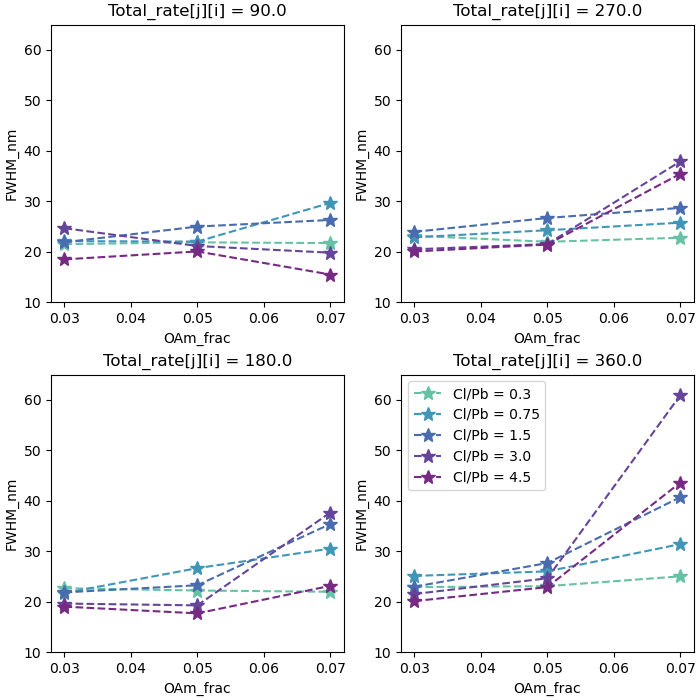

In [32]:
rows = 2
cols = 2
Total_rate = np.asarray(total_rate_0).reshape(cols, rows).T
f12, ax12 = plt.subplots(rows, cols, figsize = (7, 7), constrained_layout=True)
x_label = 'OAm_frac'
y_label = 'FWHM_nm'
color_idx = np.linspace(0, 1, len(Cl_Pb_ratio_0))
for i in range(cols):
    for j in range(rows):
        ax12[j][i].set_title(f'{Total_rate[j][i] = }')
        for k in range(len(Cl_Pb_ratio_0)):
            df_01 = df[df.Total==Total_rate[j][i]]
            df_02 = df_01[df_01.Cl_Pb==Cl_Pb_ratio_0[k]]
            x = df_02[x_label]
            y = df_02[y_label]
            label = f'Cl/Pb = {Cl_Pb_ratio_0[k]}'
            ax12[j][i].plot(x, y, '*--', label=label, color=BlGn_r(color_idx[k]), markersize=10)
            ax12[j][i].set_ylim(10, 65)
            ax12[j][i].set_xlabel(x_label)
            ax12[j][i].set_ylabel(y_label)
ax12[j][i].legend()

## Case 1-3: Plot by OAm_frac vs. PLQY at fixed total_rate

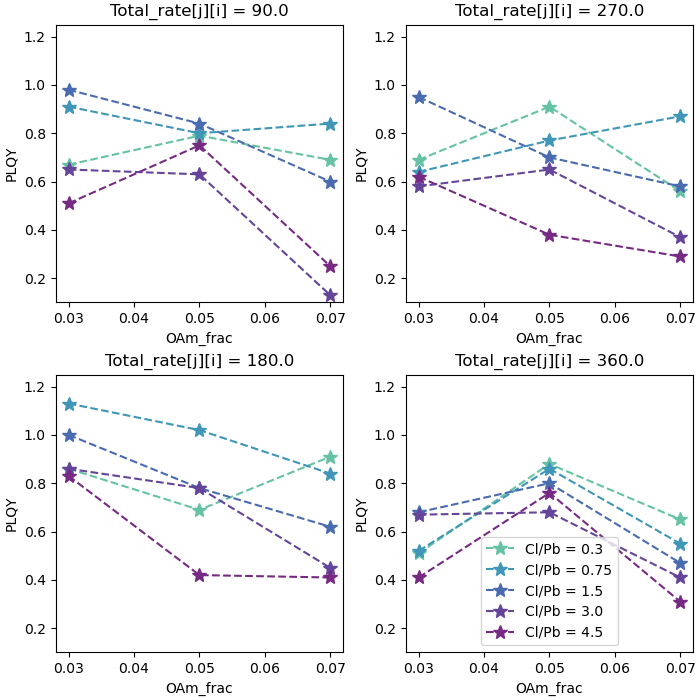

In [33]:
rows = 2
cols = 2
Total_rate = np.asarray(total_rate_0).reshape(cols, rows).T
f13, ax13 = plt.subplots(rows, cols, figsize = (7, 7), constrained_layout=True)
x_label = 'OAm_frac'
y_label = 'PLQY'
color_idx = np.linspace(0, 1, len(Cl_Pb_ratio_0))
for i in range(cols):
    for j in range(rows):
        ax13[j][i].set_title(f'{Total_rate[j][i] = }')
        for k in range(len(Cl_Pb_ratio_0)):
            df_01 = df[df.Total==Total_rate[j][i]]
            df_02 = df_01[df_01.Cl_Pb==Cl_Pb_ratio_0[k]]
            x = df_02[x_label]
            y = df_02[y_label]
            label = f'Cl/Pb = {Cl_Pb_ratio_0[k]}'
            ax13[j][i].plot(x, y, '*--', label=label, color=BlGn_r(color_idx[k]), markersize=10)
            ax13[j][i].set_ylim(0.10, 1.25)
            ax13[j][i].set_xlabel(x_label)
            ax13[j][i].set_ylabel(y_label)
ax13[j][i].legend()

## Case 2-1: Plot by total_rate vs. Peak_nm at fixed Cl_Pb_ratio

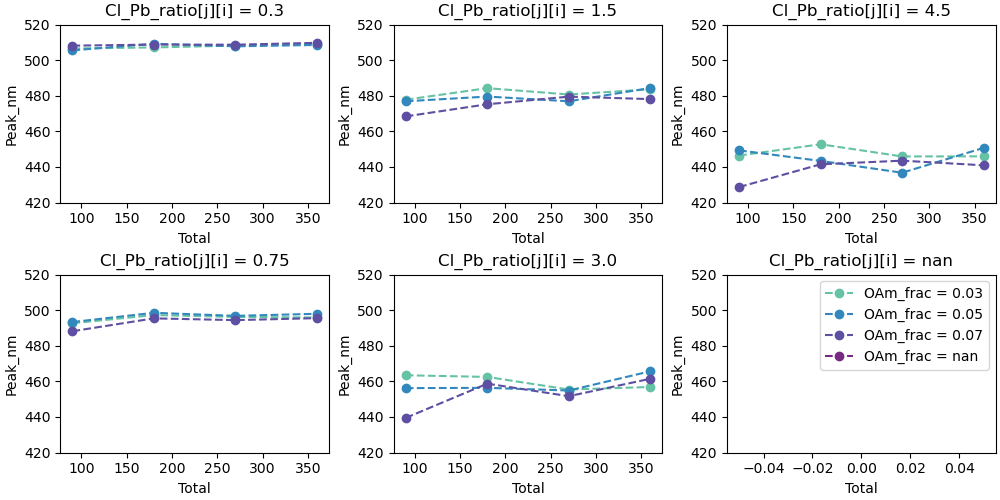

In [34]:
Cl_Pb_ratio_0 = [0.3, 0.75, 1.5, 3.0, 4.5, np.nan]
rows = 2
cols = 3
Cl_Pb_ratio = np.asarray(Cl_Pb_ratio_0).reshape(cols, rows).T
f21, ax21 = plt.subplots(rows, cols, figsize = (10, 5), constrained_layout=True)
x_label = 'Total'
y_label = 'Peak_nm'
color_idx = np.linspace(0, 1, len(OAm_frac_0))
for i in range(cols):
    for j in range(rows):
        if Cl_Pb_ratio[j][i] == np.nan:
            pass
        else:
            ax21[j][i].set_title(f'{Cl_Pb_ratio[j][i] = }')
            for k in range(len(OAm_frac_0)):
                df_01 = df[df.Cl_Pb==Cl_Pb_ratio[j][i]]
                df_02 = df_01[df_01.OAm_frac==OAm_frac_0[k]]
                x = df_02[x_label]
                y = df_02[y_label]
                label = f'OAm_frac = {OAm_frac_0[k]}'
                ax21[j][i].plot(x, y, '.--', label=label, color=BlGn_r(color_idx[k]), markersize=12)
                ax21[j][i].set_ylim(420, 520)
                ax21[j][i].set_xlabel(x_label)
                ax21[j][i].set_ylabel(y_label)
ax21[j][i].legend()

## Case 2-2: Plot by total_rate vs. FWHM_nm at fixed Cl_Pb_ratio

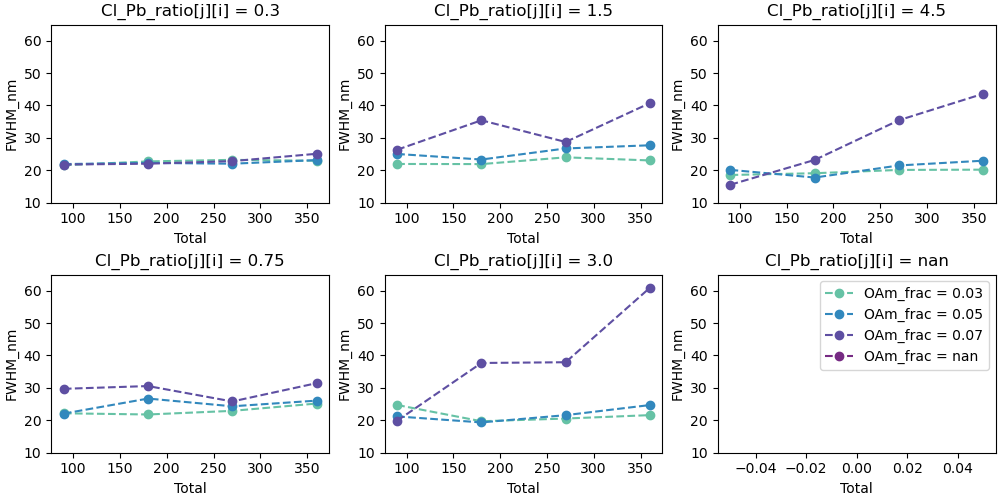

In [35]:
Cl_Pb_ratio_0 = [0.3, 0.75, 1.5, 3.0, 4.5, np.nan]
rows = 2
cols = 3
Cl_Pb_ratio = np.asarray(Cl_Pb_ratio_0).reshape(cols, rows).T
f22, ax22 = plt.subplots(rows, cols, figsize = (10, 5), constrained_layout=True)
x_label = 'Total'
y_label = 'FWHM_nm'
color_idx = np.linspace(0, 1, len(OAm_frac_0))
for i in range(cols):
    for j in range(rows):
        if Cl_Pb_ratio[j][i] == np.nan:
            pass
        else:
            ax22[j][i].set_title(f'{Cl_Pb_ratio[j][i] = }')
            for k in range(len(OAm_frac_0)):
                df_01 = df[df.Cl_Pb==Cl_Pb_ratio[j][i]]
                df_02 = df_01[df_01.OAm_frac==OAm_frac_0[k]]
                x = df_02[x_label]
                y = df_02[y_label]
                label = f'OAm_frac = {OAm_frac_0[k]}'
                ax22[j][i].plot(x, y, '.--', label=label, color=BlGn_r(color_idx[k]), markersize=12)
                ax22[j][i].set_ylim(10, 65)
                ax22[j][i].set_xlabel(x_label)
                ax22[j][i].set_ylabel(y_label)
ax22[j][i].legend()

## Case 2-3: Plot by total_rate vs. PLQY at fixed Cl_Pb_ratio

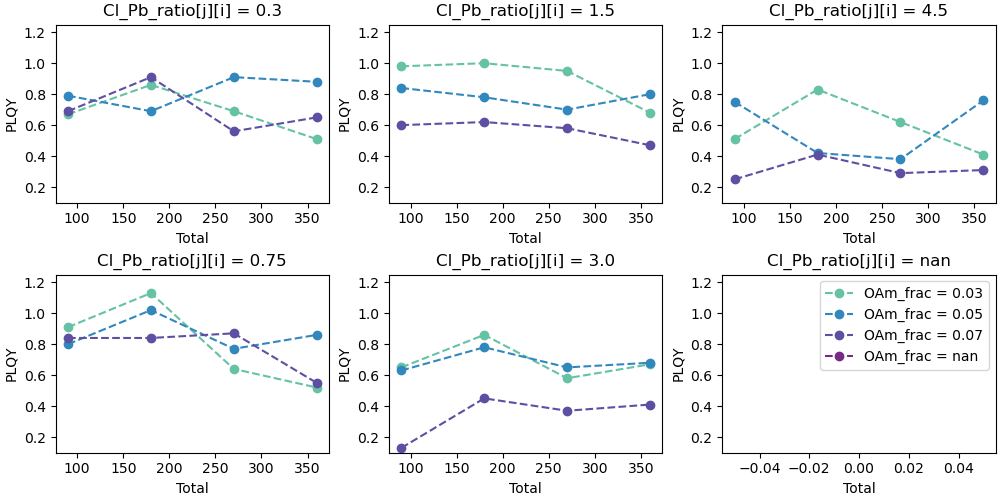

In [36]:
Cl_Pb_ratio_0 = [0.3, 0.75, 1.5, 3.0, 4.5, np.nan]
rows = 2
cols = 3
Cl_Pb_ratio = np.asarray(Cl_Pb_ratio_0).reshape(cols, rows).T
f23, ax23 = plt.subplots(rows, cols, figsize = (10, 5), constrained_layout=True)
x_label = 'Total'
y_label = 'PLQY'
color_idx = np.linspace(0, 1, len(OAm_frac_0))
for i in range(cols):
    for j in range(rows):
        if Cl_Pb_ratio[j][i] == np.nan:
            pass
        else:
            ax23[j][i].set_title(f'{Cl_Pb_ratio[j][i] = }')
            for k in range(len(OAm_frac_0)):
                df_01 = df[df.Cl_Pb==Cl_Pb_ratio[j][i]]
                df_02 = df_01[df_01.OAm_frac==OAm_frac_0[k]]
                x = df_02[x_label]
                y = df_02[y_label]
                label = f'OAm_frac = {OAm_frac_0[k]}'
                ax23[j][i].plot(x, y, '.--', label=label, color=BlGn_r(color_idx[k]), markersize=12)
                ax23[j][i].set_ylim(0.10, 1.25)
                ax23[j][i].set_xlabel(x_label)
                ax23[j][i].set_ylabel(y_label)
ax23[j][i].legend()

## Case 3-1: Plot by Cl_Pb_ratio vs. Peak_nm at fixed total_rate

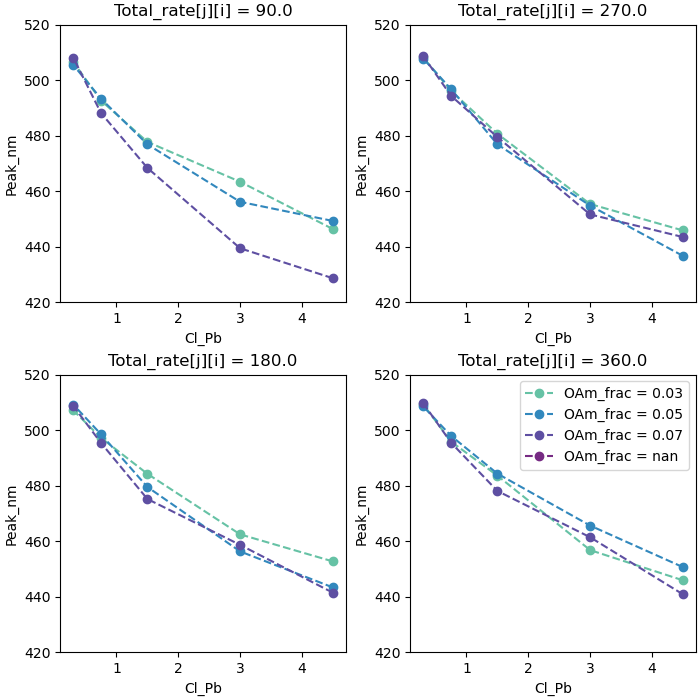

In [37]:
rows = 2
cols = 2
Total_rate = np.asarray(total_rate_0).reshape(cols, rows).T
f31, ax31 = plt.subplots(rows, cols, figsize = (7, 7), constrained_layout=True)
x_label = 'Cl_Pb'
y_label = 'Peak_nm'
color_idx = np.linspace(0, 1, len(OAm_frac_0))
for i in range(cols):
    for j in range(rows):
        ax31[j][i].set_title(f'{Total_rate[j][i] = }')
        for k in range(len(OAm_frac_0)):
            df_01 = df[df.Total==Total_rate[j][i]]
            df_02 = df_01[df_01.OAm_frac==OAm_frac_0[k]]
            x = df_02[x_label]
            y = df_02[y_label]
            label = f'OAm_frac = {OAm_frac_0[k]}'
            ax31[j][i].plot(x, y, '.--', label=label, color=BlGn_r(color_idx[k]), markersize=12)
            ax31[j][i].set_ylim(420, 520)
            ax31[j][i].set_xlabel(x_label)
            ax31[j][i].set_ylabel(y_label)
ax31[j][i].legend()

## Case 3-2: Plot by Cl_Pb_ratio vs. FWHM_nm at fixed total_rate

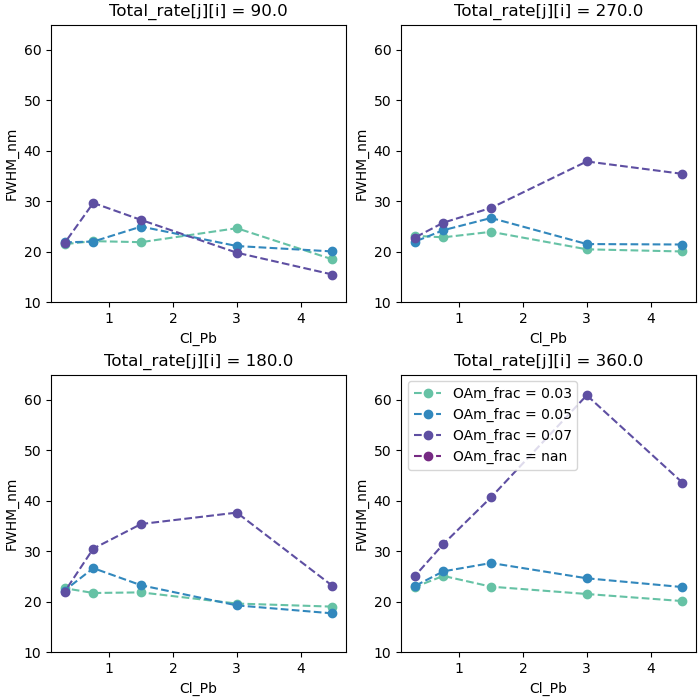

In [38]:
rows = 2
cols = 2
Total_rate = np.asarray(total_rate_0).reshape(cols, rows).T
f32, ax32 = plt.subplots(rows, cols, figsize = (7, 7), constrained_layout=True)
x_label = 'Cl_Pb'
y_label = 'FWHM_nm'
color_idx = np.linspace(0, 1, len(OAm_frac_0))
for i in range(cols):
    for j in range(rows):
        ax32[j][i].set_title(f'{Total_rate[j][i] = }')
        for k in range(len(OAm_frac_0)):
            df_01 = df[df.Total==Total_rate[j][i]]
            df_02 = df_01[df_01.OAm_frac==OAm_frac_0[k]]
            x = df_02[x_label]
            y = df_02[y_label]
            label = f'OAm_frac = {OAm_frac_0[k]}'
            ax32[j][i].plot(x, y, '.--', label=label, color=BlGn_r(color_idx[k]), markersize=12)
            ax32[j][i].set_ylim(10, 65)
            ax32[j][i].set_xlabel(x_label)
            ax32[j][i].set_ylabel(y_label)
ax32[j][i].legend()

## Case 3-3: Plot by Cl_Pb_ratio vs. PLQY at fixed total_rate

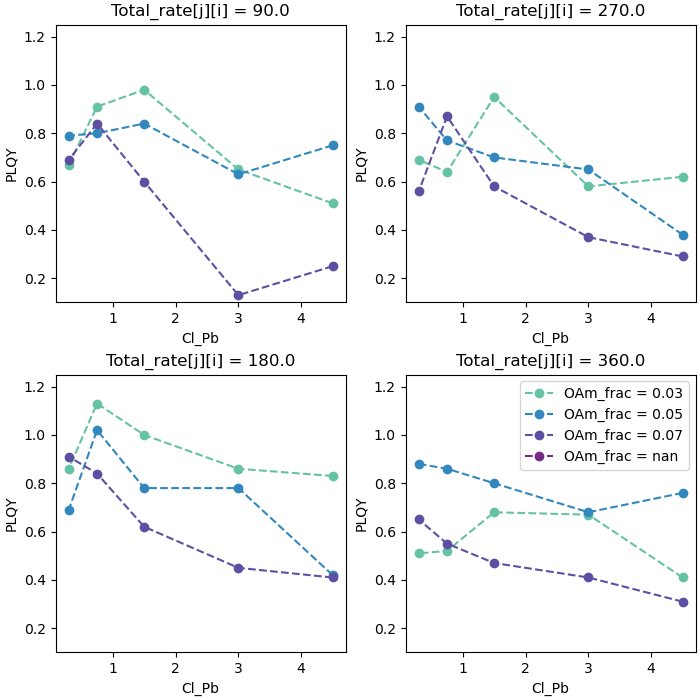

In [39]:
rows = 2
cols = 2
Total_rate = np.asarray(total_rate_0).reshape(cols, rows).T
f33, ax33 = plt.subplots(rows, cols, figsize = (7, 7), constrained_layout=True)
x_label = 'Cl_Pb'
y_label = 'PLQY'
color_idx = np.linspace(0, 1, len(OAm_frac_0))
for i in range(cols):
    for j in range(rows):
        ax33[j][i].set_title(f'{Total_rate[j][i] = }')
        for k in range(len(OAm_frac_0)):
            df_01 = df[df.Total==Total_rate[j][i]]
            df_02 = df_01[df_01.OAm_frac==OAm_frac_0[k]]
            x = df_02[x_label]
            y = df_02[y_label]
            label = f'OAm_frac = {OAm_frac_0[k]}'
            ax33[j][i].plot(x, y, '.--', label=label, color=BlGn_r(color_idx[k]), markersize=12)
            ax33[j][i].set_ylim(0.10, 1.25)
            ax33[j][i].set_xlabel(x_label)
            ax33[j][i].set_ylabel(y_label)
ax33[j][i].legend()

## Case 4-1: Plot by total_rate vs. Peak_nm at fixed OAm_frac

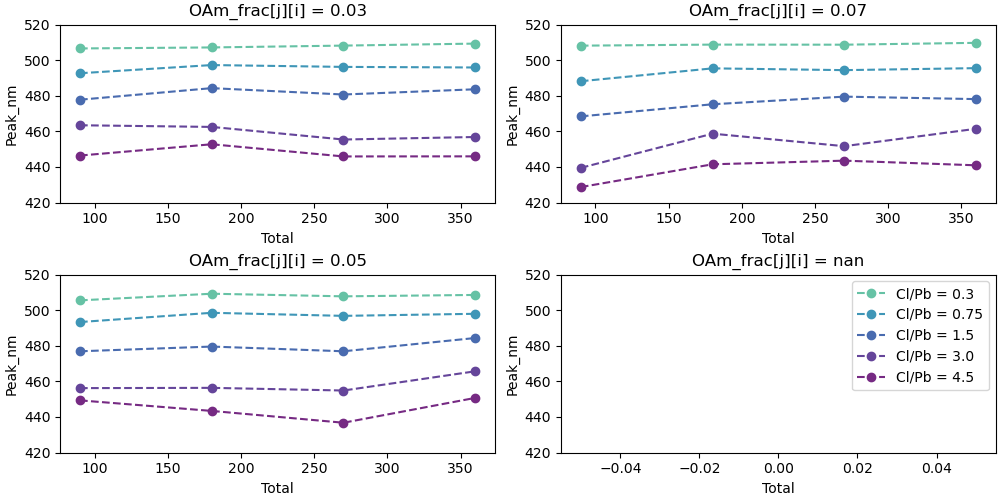

In [43]:
Cl_Pb_ratio_0 = [0.3, 0.75, 1.5, 3.0, 4.5]
OAm_frac_0 = [0.03, 0.05, 0.07, np.nan]
rows = 2
cols = 2
OAm_frac = np.asarray(OAm_frac_0).reshape(cols, rows).T
f41, ax41 = plt.subplots(rows, cols, figsize = (10, 5), constrained_layout=True)
x_label = 'Total'
y_label = 'Peak_nm'
color_idx = np.linspace(0, 1, len(Cl_Pb_ratio_0))
for i in range(cols):
    for j in range(rows):
        if OAm_frac[j][i] == np.nan:
            pass
        else:
            ax41[j][i].set_title(f'{OAm_frac[j][i] = }')
            for k in range(len(Cl_Pb_ratio_0)):
                df_01 = df[df.OAm_frac==OAm_frac[j][i]]
                df_02 = df_01[df_01.Cl_Pb==Cl_Pb_ratio_0[k]]
                x = df_02[x_label]
                y = df_02[y_label]
                label = f'Cl/Pb = {Cl_Pb_ratio_0[k]}'
                ax41[j][i].plot(x, y, '.--', label=label, color=BlGn_r(color_idx[k]), markersize=12)
                ax41[j][i].set_ylim(420, 520)
                ax41[j][i].set_xlabel(x_label)
                ax41[j][i].set_ylabel(y_label)
ax41[j][i].legend()

## Case 4-2: Plot by total_rate vs. FWHM_nm at fixed OAm_frac

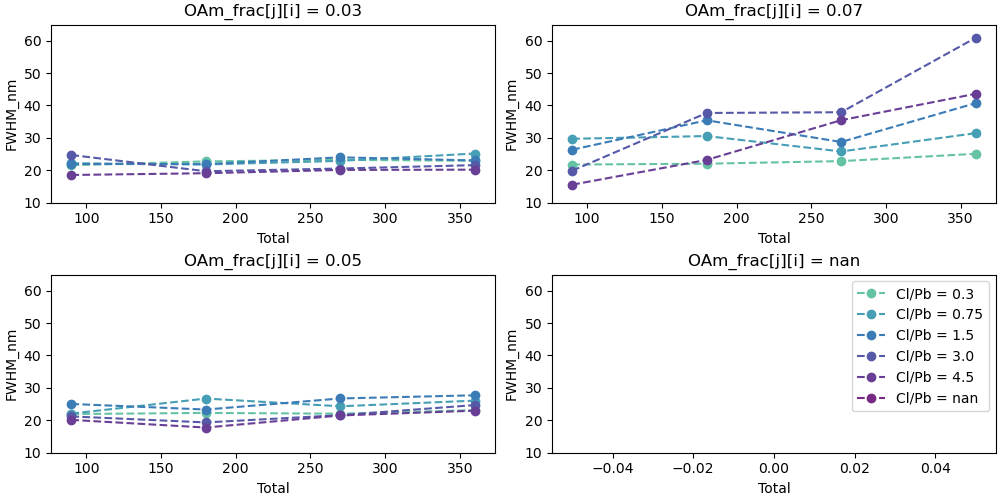

In [41]:
OAm_frac_0 = [0.03, 0.05, 0.07, np.nan]
rows = 2
cols = 2
OAm_frac = np.asarray(OAm_frac_0).reshape(cols, rows).T
f42, ax42 = plt.subplots(rows, cols, figsize = (10, 5), constrained_layout=True)
x_label = 'Total'
y_label = 'FWHM_nm'
color_idx = np.linspace(0, 1, len(Cl_Pb_ratio_0))
for i in range(cols):
    for j in range(rows):
        if OAm_frac[j][i] == np.nan:
            pass
        else:
            ax42[j][i].set_title(f'{OAm_frac[j][i] = }')
            for k in range(len(Cl_Pb_ratio_0)):
                df_01 = df[df.OAm_frac==OAm_frac[j][i]]
                df_02 = df_01[df_01.Cl_Pb==Cl_Pb_ratio_0[k]]
                x = df_02[x_label]
                y = df_02[y_label]
                label = f'Cl/Pb = {Cl_Pb_ratio_0[k]}'
                ax42[j][i].plot(x, y, '.--', label=label, color=BlGn_r(color_idx[k]), markersize=12)
                ax42[j][i].set_ylim(10, 65)
                ax42[j][i].set_xlabel(x_label)
                ax42[j][i].set_ylabel(y_label)
ax42[j][i].legend()

## Case 4-3: Plot by total_rate vs. PLQY at fixed OAm_frac

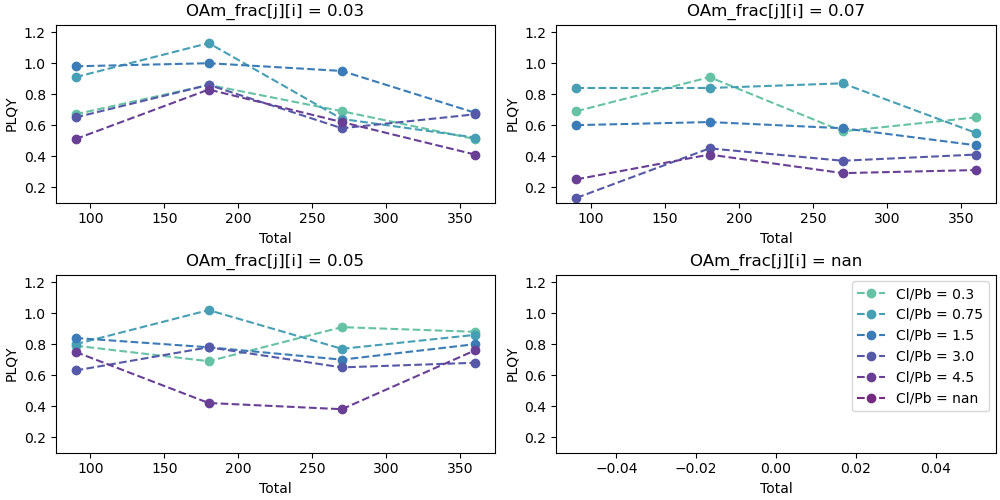

In [42]:
OAm_frac_0 = [0.03, 0.05, 0.07, np.nan]
rows = 2
cols = 2
OAm_frac = np.asarray(OAm_frac_0).reshape(cols, rows).T
f43, ax43 = plt.subplots(rows, cols, figsize = (10, 5), constrained_layout=True)
x_label = 'Total'
y_label = 'PLQY'
color_idx = np.linspace(0, 1, len(Cl_Pb_ratio_0))
for i in range(cols):
    for j in range(rows):
        if OAm_frac[j][i] == np.nan:
            pass
        else:
            ax43[j][i].set_title(f'{OAm_frac[j][i] = }')
            for k in range(len(Cl_Pb_ratio_0)):
                df_01 = df[df.OAm_frac==OAm_frac[j][i]]
                df_02 = df_01[df_01.Cl_Pb==Cl_Pb_ratio_0[k]]
                x = df_02[x_label]
                y = df_02[y_label]
                label = f'Cl/Pb = {Cl_Pb_ratio_0[k]}'
                ax43[j][i].plot(x, y, '.--', label=label, color=BlGn_r(color_idx[k]), markersize=12)
                ax43[j][i].set_ylim(0.10, 1.25)
                ax43[j][i].set_xlabel(x_label)
                ax43[j][i].set_ylabel(y_label)
ax43[j][i].legend()

In [21]:
plt.close('all')

In [22]:
df['Peak_nm'].to_numpy()

array([446.4 , 463.41, 477.76, 492.63, 506.55, 449.31, 456.19, 476.88,
       493.3 , 505.48, 428.7 , 439.48, 468.4 , 488.14, 508.12, 452.74,
       462.48, 484.26, 497.22, 507.12, 443.38, 456.34, 479.53, 498.49,
       509.2 , 441.49, 458.69, 475.2 , 495.37, 508.71, 445.9 , 455.4 ,
       480.68, 496.19, 508.15, 436.75, 454.84, 476.88, 496.77, 507.74,
       443.53, 451.66, 479.49, 494.37, 508.66, 445.95, 456.82, 483.62,
       495.86, 509.27, 450.7 , 465.64, 484.33, 497.93, 508.52, 440.92,
       461.44, 478.1 , 495.49, 509.7 ], dtype=float32)

## Case 5-1: Plot in 4D scatter - x:R_time_sec vs. y:OAm_frac vs. z:Cl_Pb vs. colorbar:Peak_nm

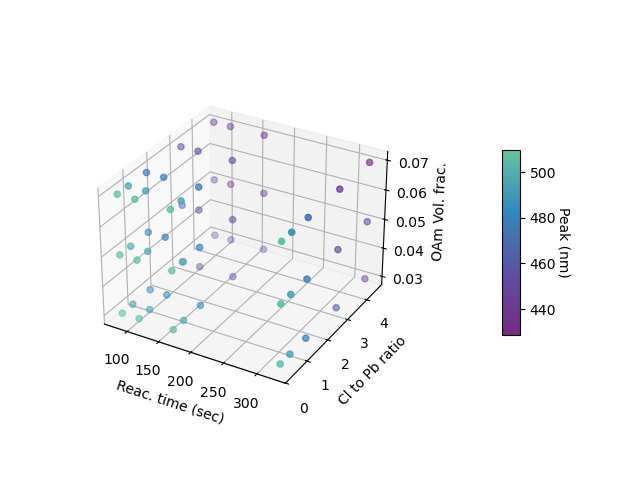

In [23]:
f51 = plt.figure()
ax51 = f51.add_subplot(111, projection='3d')

x = df['R_time_sec'].to_numpy()
z = df['OAm_frac'].to_numpy()
y = df['Cl_Pb'].to_numpy()
c = df['Peak_nm'].to_numpy()

x_label = 'Reac. time (sec)'
z_label = 'OAm Vol. frac.'
y_label = 'Cl to Pb ratio'
c_label = 'Peak (nm)'

img = ax51.scatter(x, y, z, c=c, cmap=BlGn)

cbar = f51.colorbar(img, shrink=0.5, aspect=10, pad=0.2); # Default location is at the 'right' of the figure.
cbar.ax.get_yaxis().labelpad = 10
cbar.ax.set_ylabel(c_label, rotation = 270);

ax51.set_xlabel(x_label) 
ax51.set_ylabel(y_label)
ax51.set_zlabel(z_label)
plt.show()

## Case 5-2: Plot in 4D scatter - x:R_time_sec vs. y:OAm_frac vs. z:Cl_Pb vs. colorbar:FWHM_nm

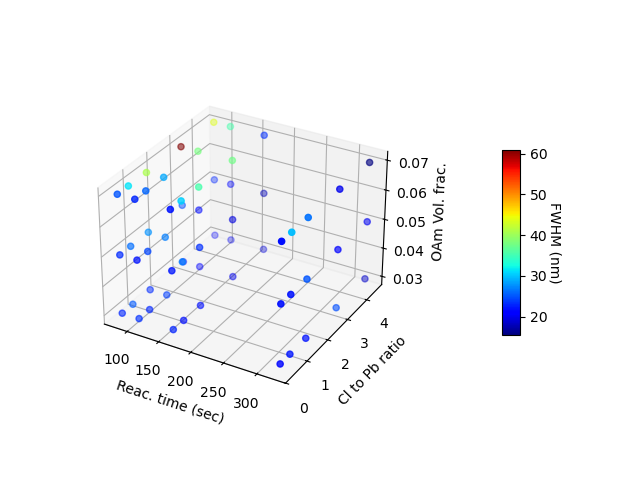

In [24]:
f52 = plt.figure()
ax52 = f52.add_subplot(111, projection='3d')

x = df['R_time_sec'].to_numpy()
z = df['OAm_frac'].to_numpy()
y = df['Cl_Pb'].to_numpy()
c = df['FWHM_nm'].to_numpy()

x_label = 'Reac. time (sec)'
z_label = 'OAm Vol. frac.'
y_label = 'Cl to Pb ratio'
c_label = 'FWHM (nm)'

img = ax52.scatter(x, y, z, c=c, cmap='jet')

cbar = f52.colorbar(img, shrink=0.5, aspect=10, pad=0.2); # Default location is at the 'right' of the figure.
cbar.ax.get_yaxis().labelpad = 10
cbar.ax.set_ylabel(c_label, rotation = 270);

ax52.set_xlabel(x_label) 
ax52.set_ylabel(y_label)
ax52.set_zlabel(z_label)
plt.show()

## Case 5-3: Plot in 4D scatter - x:R_time_sec vs. y:OAm_frac vs. z:Cl_Pb vs. colorbar:PLQY

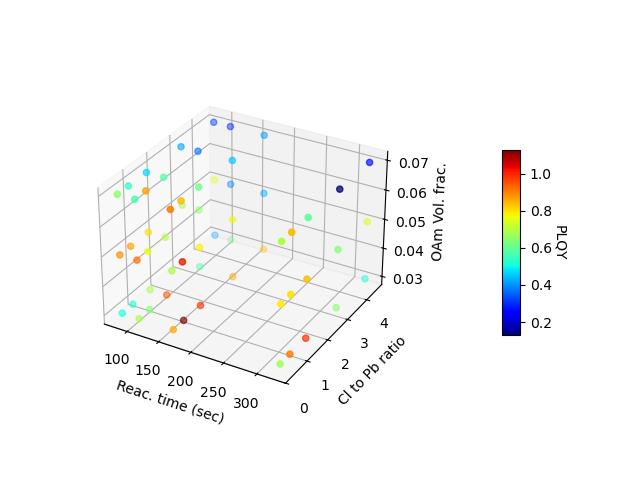

In [25]:
f53 = plt.figure()
ax53 = f53.add_subplot(111, projection='3d')

x = df['R_time_sec'].to_numpy()
z = df['OAm_frac'].to_numpy()
y = df['Cl_Pb'].to_numpy()
c = df['PLQY'].to_numpy()

x_label = 'Reac. time (sec)'
z_label = 'OAm Vol. frac.'
y_label = 'Cl to Pb ratio'
c_label = 'PLQY'

img = ax53.scatter(x, y, z, c=c, cmap='jet')

cbar = f53.colorbar(img, shrink=0.5, aspect=10, pad=0.2); # Default location is at the 'right' of the figure.
cbar.ax.get_yaxis().labelpad = 10
cbar.ax.set_ylabel(c_label, rotation = 270);

ax53.set_xlabel(x_label) 
ax53.set_ylabel(y_label)
ax53.set_zlabel(z_label)
plt.show()

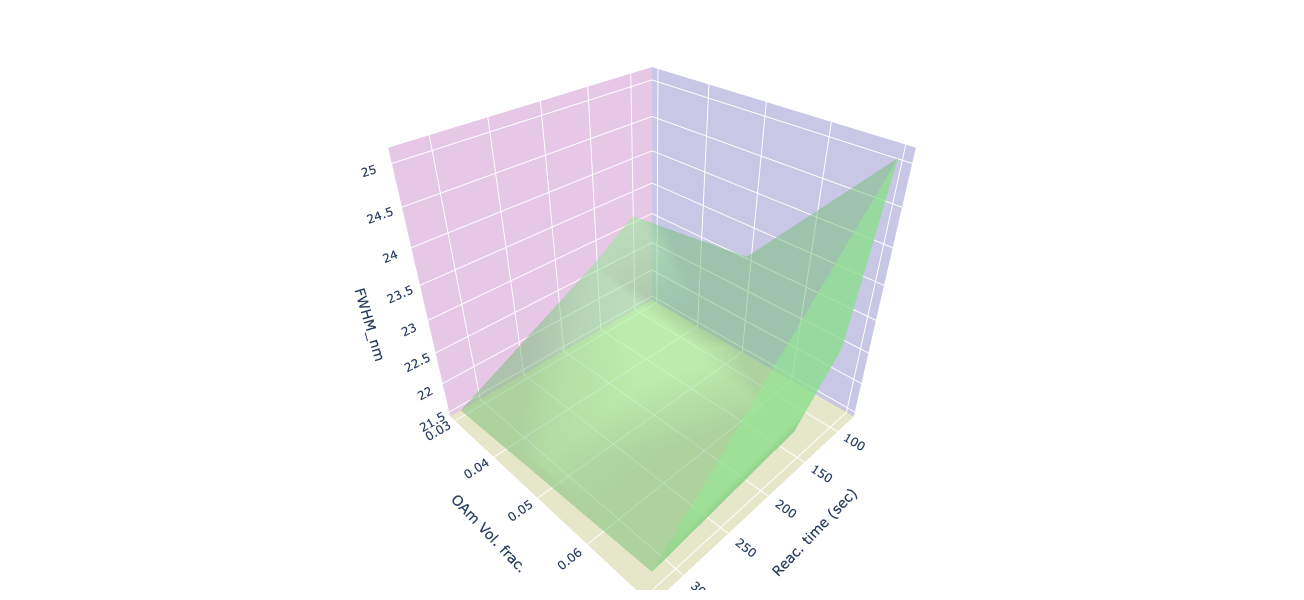

In [30]:
import plotly.graph_objects as go

Cl_Pb_ratio_0 = [0.3, 0.75, 1.5, 3.0, 4.5]

df_01 = df[df.Cl_Pb==Cl_Pb_ratio_0[0]]


x_label = 'Reac. time (sec)'
y_label = 'OAm Vol. frac.'
# y_label = 'Cl to Pb ratio'
z_label = 'FWHM_nm'

x = df_01['R_time_sec'].to_numpy()
y = df_01['OAm_frac'].to_numpy()
# y = df_01['Cl_Pb'].to_numpy()
z = df_01['FWHM_nm'].to_numpy()


fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, color='lightgreen', opacity=0.50)])
fig.update_layout(autosize=False, width=700, height=600, 
                  xaxis_title=x_label, yaxis_title=y_label,)
fig.update_layout(scene = dict(
                    xaxis_title=x_label,
                    yaxis_title=y_label,
                    zaxis_title=z_label),
                    margin=dict(r=20, b=10, l=10, t=10))

fig.update_layout(scene = dict(
                    xaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    zaxis = dict(
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",),),
                    margin=dict(
                    r=10, l=10,
                    b=10, t=10)
                  )

fig.update_layout(scene = dict(
                    yaxis = dict(
                        nticks=5,), )
                 )


if z_label == 'Peak (nm)':
    fig.update_layout(
        scene = dict(zaxis = dict(nticks=4, range=[440,515],),),)


fig.show()


In [27]:
import plotly.graph_objects as go

R_time_0 = [324.29, 162.15, 108.10, 81.07,]

df = df.astype('float64').round(2)
df_02 = df[df.R_time_sec==R_time_0[-1]]


x_label = 'Cl to Pb ratio'
y_label = 'OAm Vol. frac.'
# y_label = 'Cl to Pb ratio'
z_label = 'PLQY'

x = df_02['Cl_Pb'].to_numpy()
y = df_02['OAm_frac'].to_numpy()
# y = df_02['Cl_Pb'].to_numpy()
z = df_02['PLQY'].to_numpy()


fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, color='lightgreen', opacity=0.50)])
fig.update_layout(autosize=False, width=700, height=600, 
                  xaxis_title=x_label, yaxis_title=y_label,)
fig.update_layout(scene = dict(
                    xaxis_title=x_label,
                    yaxis_title=y_label,
                    zaxis_title=z_label),
                    margin=dict(r=20, b=10, l=10, t=10))

fig.update_layout(scene = dict(
                    xaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    zaxis = dict(
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",),),
                    margin=dict(
                    r=10, l=10,
                    b=10, t=10)
                  )

fig.update_layout(scene = dict(
                    yaxis = dict(
                        nticks=5,), )
                 )


if z_label == 'Peak (nm)':
    fig.update_layout(
        scene = dict(zaxis = dict(nticks=4, range=[440,515],),),)


fig.show()


In [28]:
# name_color_map_surface = 'jet'  # Colormap for the 3D surface only.

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.set_xlabel('Reaction time (sec)') 
# ax.set_ylabel('OAm Vol frac')
# ax.set_zlabel('Cl to Pb ratio')
# # plt.title('%s in fcn of %s, %s and %s' % (list_name_variables[index_c], list_name_variables[index_x], list_name_variables[index_y], list_name_variables[index_z]) );

# # In this case, we will have 2 color bars: one for the surface and another for 
# # the "scatter plot".
# # For example, we can place the second color bar under or to the left of the figure.
# choice_pos_colorbar = 2

# #The scatter plot.
# img = ax.scatter(x, y, z, c = c, cmap = BlGn);
# cbar = fig.colorbar(img, shrink=0.5, aspect=10); # Default location is at the 'right' of the figure.
# cbar.ax.get_yaxis().labelpad = 15
# cbar.ax.set_ylabel('Peak (nm)', rotation = 270);

# # The 3D surface that serves only to connect the points to help visualize 
# # the distances that separates them.
# # The "alpha" is used to have some transparency in the surface.
# surf = ax.plot_trisurf(x, y, z, cmap = name_color_map_surface, linewidth = 0.2, alpha = 0.25)

# # The second color bar will be placed at the left of the figure.
# if choice_pos_colorbar == 1: 
#     #I am trying here to have the two color bars with the same size even if it 
#     #is currently set manually.
#     cbaxes = fig.add_axes([1-0.78375-0.1, 0.3025, 0.0393823, 0.385]);  # Case without tigh layout.
#     #cbaxes = fig.add_axes([1-0.844805-0.1, 0.25942, 0.0492187, 0.481161]); # Case with tigh layout.

#     cbar = plt.colorbar(surf, cax = cbaxes, shrink=0.5, aspect=5)
#     cbar.ax.get_yaxis().labelpad = 15
#     cbar.ax.set_ylabel('Cl to Pb ratio', rotation = 90)

# # The second color bar will be placed under the figure.
# elif choice_pos_colorbar == 2: 
#     cbar = fig.colorbar(surf, shrink=0.75, aspect=20, pad = 0.1, orientation = 'horizontal');
#     cbar.ax.get_yaxis().labelpad = 15
#     cbar.ax.set_xlabel('Cl to Pb ratio', rotation = 0)
# #end
# plt.show();

In [29]:
# f51 = plt.figure(figsize = (10, 6))
# ax51 = plt.axes(projection='3d')
# # df_reshape = df1.pivot(index='n_ab', columns='n_c', values='Number_Frac.')
# df_reshape = df.pivot(index='R_time_sec', columns='OAm_frac', values='Peak_nm')

# X = np.array(df_reshape.index)
# Y = np.array(df_reshape.columns)
# X, Y = np.meshgrid(Y, X)
# Z = np.array(df_reshape)
# Z[Z<0.001] = np.nan

# surf = ax51.plot_surface(X, Y, Z, vmin=400, vmax=515, rstride=1, cstride=1, cmap=cmap)
# cbar = f51.colorbar(surf, shrink=0.5, aspect=10)

# ax51.set_ylim(80, 325)   ## L_c
# ax51.set_xlim(0.02, 0.08)   ## D_ab
# ax51.view_init(20, 70)


# #ax2.set_xticks([])
# ax2.tick_params(axis='x', direction='in', labelsize=labelsize-4)

# # ax2.set_yticks([])
# ax2.set_yticks(np.arange(ax2.get_ylim()[0], ax2.get_ylim()[1], 2))
# ax2.tick_params(axis='y', direction='in', labelsize=labelsize-4)

# z_step = 0.05; z0 = 0; z1 = np.nanmax(Z)+z_step*0
# ax2.set_zticks(np.arange(z0, z1, z_step))
# ax2.tick_params(axis='z', direction='in', labelsize=labelsize-4, pad=10)

# cbar.set_ticks(np.arange(z0, z1, z_step))
# cbar.ax.tick_params(labelsize=labelsize-4)

# imag_name = 'Size_dis_3D_06-6.png'
# # plt.savefig(imag_name, dpi = 600,  transparent=True)